<a href="https://colab.research.google.com/github/EvelinneG/ETL/blob/main/Practica4_VariablesDependientes_REAR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

# Leer el archivo como archivo de texto separado por tabulaciones
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Variables /Ramirez_Galindo01.xls', sep='\t')

# Ver las primeras filas
df.head()

,Time,Link (<51),RAW,Delta (0.5-2.75 Hz),Theta(3.5-6.75 Hz),Low Alpha (7.5-9.25 Hz),High Alpha (10-11.75 Hz),Low Beta (13-16.75 Hz),High Beta (18-29.75 Hz),Low Gamma (31-39.75 Hz),High Gamma (41-49.75 Hz),Atte (%),Med (%),Flag
0,"1743709424,17959",200,56,0,0,0,0,0,0,0,0,0,0,a
1,"1743709424,1806",200,56,0,0,0,0,0,0,0,0,0,0,a
2,"1743709424,1806",200,56,0,0,0,0,0,0,0,0,0,0,a
3,"1743709424,1806",200,56,0,0,0,0,0,0,0,0,0,0,a
4,"1743709424,1806",200,56,0,0,0,0,0,0,0,0,0,0,a


# **PRUEBA 1**

# Filtrar por Link <51

In [3]:
dfc = df.copy()
df_filtrado = dfc[dfc['Link (<51)'] < 51].copy()

df_filtrado.head()

,Time,Link (<51),RAW,Delta (0.5-2.75 Hz),Theta(3.5-6.75 Hz),Low Alpha (7.5-9.25 Hz),High Alpha (10-11.75 Hz),Low Beta (13-16.75 Hz),High Beta (18-29.75 Hz),Low Gamma (31-39.75 Hz),High Gamma (41-49.75 Hz),Atte (%),Med (%),Flag
485,"1743709424,50824",25,240,1998174,548802,23514,123028,217373,190139,48953,34013,0,0,a
486,"1743709424,50874",25,298,1998174,548802,23514,123028,217373,190139,48953,34013,0,0,a
487,"1743709424,50874",25,253,1998174,548802,23514,123028,217373,190139,48953,34013,0,0,a
488,"1743709424,50874",25,278,1998174,548802,23514,123028,217373,190139,48953,34013,0,0,a
489,"1743709424,50874",25,402,1998174,548802,23514,123028,217373,190139,48953,34013,0,0,a


# Calculo manual

**Medias**

In [5]:
mean_x = df_filtrado['Atte (%)'].mean()
mean_y = df_filtrado['Med (%)'].mean()
print(f"\n🔹 Media de Atencion (X̄): {mean_x}")
print(f"🔹 Media de Meditacion (Ȳ): {mean_y}")


🔹 Media de Atencion (X̄): 32.953968722336974
🔹 Media de Meditacion (Ȳ): 26.283269401003245


**Terminos medios**

In [6]:
df_filtrado['X-X̄'] = df_filtrado['Atte (%)'] - mean_x
df_filtrado['Y-Ȳ'] = df_filtrado['Med (%)'] - mean_y
df_filtrado['(X-X̄)(Y-Ȳ)'] = df_filtrado['X-X̄'] * df_filtrado['Y-Ȳ']
df_filtrado['(X-X̄)²'] = df_filtrado['X-X̄']**2
df_filtrado['(Y-Ȳ)²'] = df_filtrado['Y-Ȳ']**2

print("\n📊 Tabla con cálculos intermedios:")
print(df_filtrado[['Atte (%)', 'Med (%)', 'X-X̄', 'Y-Ȳ', '(X-X̄)(Y-Ȳ)', '(X-X̄)²', '(Y-Ȳ)²']])


📊 Tabla con cálculos intermedios:
       Atte (%)  Med (%)       X-X̄        Y-Ȳ  (X-X̄)(Y-Ȳ)      (X-X̄)²  \
485           0        0 -32.953969 -26.283269   866.138038  1085.964055   
486           0        0 -32.953969 -26.283269   866.138038  1085.964055   
487           0        0 -32.953969 -26.283269   866.138038  1085.964055   
488           0        0 -32.953969 -26.283269   866.138038  1085.964055   
489           0        0 -32.953969 -26.283269   866.138038  1085.964055   
...         ...      ...        ...        ...          ...          ...   
28616        21       26 -11.953969  -0.283269     3.386194   142.897368   
28617        21       26 -11.953969  -0.283269     3.386194   142.897368   
28618        21       26 -11.953969  -0.283269     3.386194   142.897368   
28619        21       26 -11.953969  -0.283269     3.386194   142.897368   
28620        21       26 -11.953969  -0.283269     3.386194   142.897368   

           (Y-Ȳ)²  
485    690.810250  
486    690.8

**Sumatorias**

In [7]:
numerator = df_filtrado['(X-X̄)(Y-Ȳ)'].sum()
denominator = (df_filtrado['(X-X̄)²'].sum() * df_filtrado['(Y-Ȳ)²'].sum())**0.5
r_manual = numerator / denominator

print(f"\n🔍 Resultado Manual:")
print(f"Numerador (Covarianza): {numerator}")
print(f"Denominador: {denominator}")
print(f"Coeficiente de Pearson (r): {r_manual:.2f}")


🔍 Resultado Manual:
Numerador (Covarianza): 4727137.520212451
Denominador: 7189719.16851683
Coeficiente de Pearson (r): 0.66


# Verificacion con librerias

In [8]:
from scipy.stats import pearsonr
r_lib, p_value = pearsonr(df_filtrado['Atte (%)'], df_filtrado['Med (%)'])
print("\n✅ Verificación con SciPy:")
print(f"Coeficiente de Pearson: {r_lib:.2f}")
print(f"Valor-p: {p_value:.4f} (significativo si < 0.05)")


✅ Verificación con SciPy:
Coeficiente de Pearson: 0.66
Valor-p: 0.0000 (significativo si < 0.05)


# Visualizacion

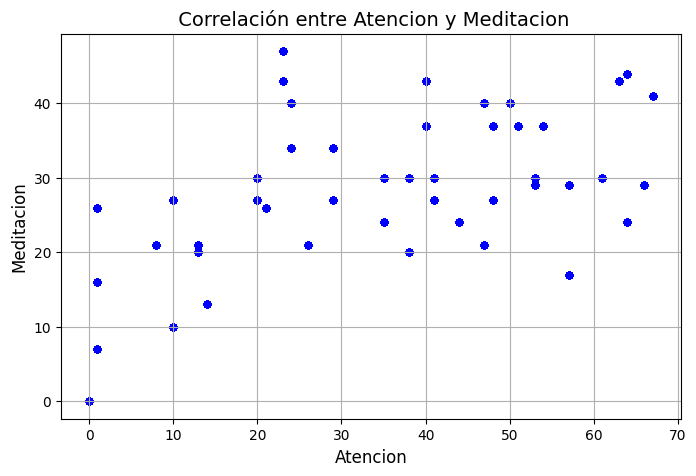

In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 5))
plt.scatter(df_filtrado['Atte (%)'], df_filtrado['Med (%)'], color='blue', s=20)
plt.title(' Correlación entre Atencion y Meditacion', fontsize=14)
plt.xlabel('Atencion', fontsize=12)
plt.ylabel('Meditacion', fontsize=12)
plt.grid(True)
plt.show()

# Gráfico de dispersión Calculando la línea de regresión lineal (tendencia)

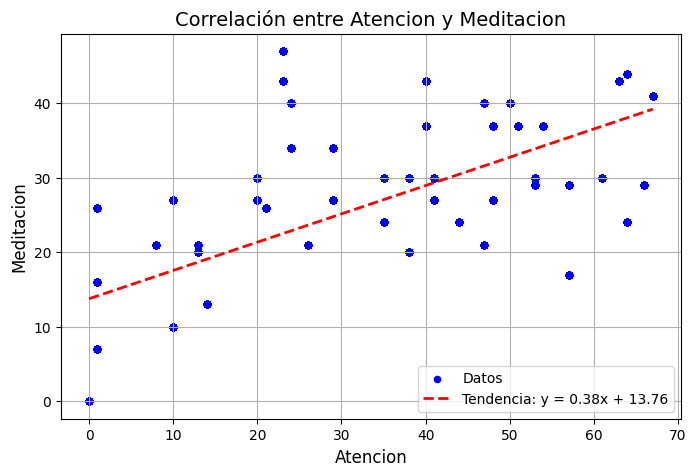

In [10]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(8, 5))
plt.scatter(df_filtrado['Atte (%)'], df_filtrado['Med (%)'], color='blue', s=20, label='Datos')

m, b = np.polyfit(df_filtrado['Atte (%)'], df_filtrado['Med (%)'], 1)  # 1 = grado lineal (y = mx + b)
x_vals = np.sort(df_filtrado['Atte (%)'])
y_vals = m * x_vals + b
plt.plot(x_vals, y_vals, color='red', linestyle='--', linewidth=2, label=f'Tendencia: y = {m:.2f}x + {b:.2f}')

# Personalización
plt.title('Correlación entre Atencion y Meditacion', fontsize=14)
plt.xlabel('Atencion', fontsize=12)
plt.ylabel('Meditacion', fontsize=12)
plt.grid(True)
plt.legend()
plt.show()

# Interpretacion

In [11]:
print("\n💡 Interpretación:")
if abs(r_manual) > 0.7:
    print("Correlación fuerte (🔵 Relación lineal clara).")
elif abs(r_manual) > 0.3:
    print("Correlación moderada (🟡 Relación parcial).")
else:
    print("Correlación débil o nula (🔴 Sin relación lineal).")


💡 Interpretación:
Correlación moderada (🟡 Relación parcial).


# **PRUEBA 2**

In [12]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Variables /Ramirez_Galindo02.xls', sep='\t')

df.head()

,Time,Link (<51),RAW,Delta (0.5-2.75 Hz),Theta(3.5-6.75 Hz),Low Alpha (7.5-9.25 Hz),High Alpha (10-11.75 Hz),Low Beta (13-16.75 Hz),High Beta (18-29.75 Hz),Low Gamma (31-39.75 Hz),High Gamma (41-49.75 Hz),Atte (%),Med (%),Flag
0,"1743709500,15424",200,55,0,0,0,0,0,0,0,0,0,0,a
1,"1743709500,15424",200,56,0,0,0,0,0,0,0,0,0,0,a
2,"1743709500,15424",200,56,0,0,0,0,0,0,0,0,0,0,a
3,"1743709500,15424",200,56,0,0,0,0,0,0,0,0,0,0,a
4,"1743709500,15424",200,56,0,0,0,0,0,0,0,0,0,0,a


# Filtrar por Link <51

In [13]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Variables /Ramirez_Galindo02.xls', sep='\t')
df.head()

dfc2 = df.copy() # Create a copy of the DataFrame and assign it to dfc2
df_filtrado2 = dfc2[dfc2['Link (<51)'] < 51].copy() # Filter using the copied DataFrame dfc2

df_filtrado2.head()

,Time,Link (<51),RAW,Delta (0.5-2.75 Hz),Theta(3.5-6.75 Hz),Low Alpha (7.5-9.25 Hz),High Alpha (10-11.75 Hz),Low Beta (13-16.75 Hz),High Beta (18-29.75 Hz),Low Gamma (31-39.75 Hz),High Gamma (41-49.75 Hz),Atte (%),Med (%),Flag
453,"1743709500,48576",25,-134,224769,193488,20298,14195,29033,39928,10024,5328,0,0,a
454,"1743709500,48576",25,-129,224769,193488,20298,14195,29033,39928,10024,5328,0,0,a
455,"1743709500,48576",25,-118,224769,193488,20298,14195,29033,39928,10024,5328,0,0,a
456,"1743709500,48576",25,-102,224769,193488,20298,14195,29033,39928,10024,5328,0,0,a
457,"1743709500,48576",25,-91,224769,193488,20298,14195,29033,39928,10024,5328,0,0,a


# Calculo manual

**Medias**

In [14]:
mean_x2 = df_filtrado2['Atte (%)'].mean()
mean_y2 = df_filtrado2['Med (%)'].mean()
print(f"\n🔹 Media de Atencion (X̄): {mean_x2}")
print(f"🔹 Media de Meditacion (Ȳ): {mean_y2}")


🔹 Media de Atencion (X̄): 32.74389299542415
🔹 Media de Meditacion (Ȳ): 32.59429778247096


**Terminos medios**

In [15]:
df_filtrado2['X-X̄'] = df_filtrado2['Atte (%)'] - mean_x2
df_filtrado2['Y-Ȳ'] = df_filtrado2['Med (%)'] - mean_y2
df_filtrado2['(X-X̄)(Y-Ȳ)'] = df_filtrado2['X-X̄'] * df_filtrado2['Y-Ȳ']
df_filtrado2['(X-X̄)²'] = df_filtrado2['X-X̄']**2
df_filtrado2['(Y-Ȳ)²'] = df_filtrado2['Y-Ȳ']**2

print("\n📊 Tabla con cálculos intermedios:")
print(df_filtrado2[['Atte (%)', 'Med (%)', 'X-X̄', 'Y-Ȳ', '(X-X̄)(Y-Ȳ)', '(X-X̄)²', '(Y-Ȳ)²']])


📊 Tabla con cálculos intermedios:
       Atte (%)  Med (%)       X-X̄        Y-Ȳ  (X-X̄)(Y-Ȳ)      (X-X̄)²  \
453           0        0 -32.743893 -32.594298  1067.264199  1072.162528   
454           0        0 -32.743893 -32.594298  1067.264199  1072.162528   
455           0        0 -32.743893 -32.594298  1067.264199  1072.162528   
456           0        0 -32.743893 -32.594298  1067.264199  1072.162528   
457           0        0 -32.743893 -32.594298  1067.264199  1072.162528   
...         ...      ...        ...        ...          ...          ...   
28858        51       34  18.256107   1.405702    25.662650   333.285443   
28859        51       34  18.256107   1.405702    25.662650   333.285443   
28860        51       34  18.256107   1.405702    25.662650   333.285443   
28861        51       34  18.256107   1.405702    25.662650   333.285443   
28862        51       34  18.256107   1.405702    25.662650   333.285443   

            (Y-Ȳ)²  
453    1062.388248  
454    106

**Sumatorias**

In [16]:
numerator2 = df_filtrado2['(X-X̄)(Y-Ȳ)'].sum()
denominator2 = (df_filtrado2['(X-X̄)²'].sum() * df_filtrado2['(Y-Ȳ)²'].sum())**0.5
r_manual2 = numerator2 / denominator2

print(f"\n🔍 Resultado Manual:")
print(f"Numerador (Covarianza): {numerator2}")
print(f"Denominador: {denominator2}")
print(f"Coeficiente de Pearson (r): {r_manual2:.2f}")


🔍 Resultado Manual:
Numerador (Covarianza): 5508620.110665259
Denominador: 13465419.128333509
Coeficiente de Pearson (r): 0.41


# Verificacion con librerias

In [17]:
from scipy.stats import pearsonr
r_lib2, p_value2 = pearsonr(df_filtrado2['Atte (%)'], df_filtrado2['Med (%)'])
print("\n✅ Verificación con SciPy:")
print(f"Coeficiente de Pearson: {r_lib2:.2f}")
print(f"Valor-p: {p_value2:.4f} (significativo si < 0.05)")


✅ Verificación con SciPy:
Coeficiente de Pearson: 0.41
Valor-p: 0.0000 (significativo si < 0.05)


# Visualizacion

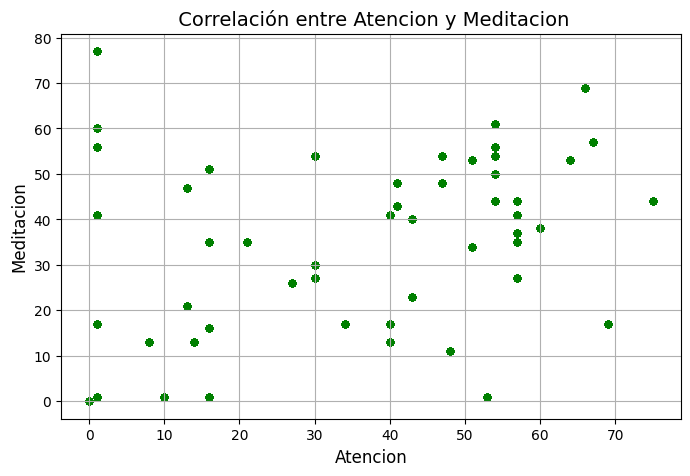

In [18]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 5))
plt.scatter(df_filtrado2['Atte (%)'], df_filtrado2['Med (%)'], color='green', s=20)
plt.title(' Correlación entre Atencion y Meditacion', fontsize=14)
plt.xlabel('Atencion', fontsize=12)
plt.ylabel('Meditacion', fontsize=12)
plt.grid(True)
plt.show()

# Gráfico de dispersión Calculando la línea de regresión lineal (tendencia)

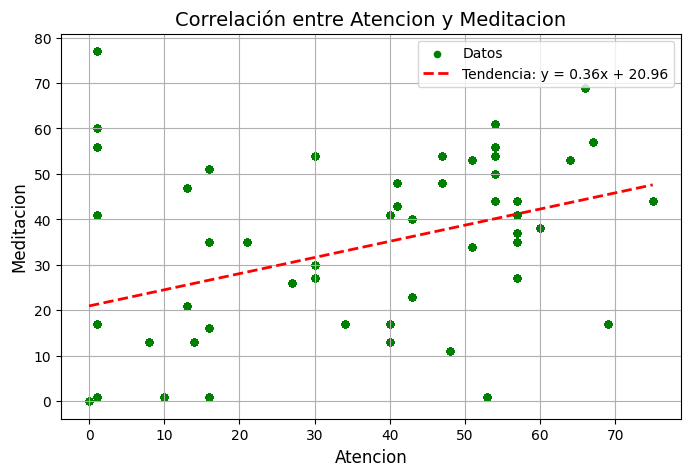

In [19]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(8, 5))
plt.scatter(df_filtrado2['Atte (%)'], df_filtrado2['Med (%)'], color='green', s=20, label='Datos')

m2, b2 = np.polyfit(df_filtrado2['Atte (%)'], df_filtrado2['Med (%)'], 1)  # 1 = grado lineal (y = mx + b)
x2_vals = np.sort(df_filtrado2['Atte (%)'])
y2_vals = m2 * x2_vals + b2
plt.plot(x2_vals, y2_vals, color='red', linestyle='--', linewidth=2, label=f'Tendencia: y = {m2:.2f}x + {b2:.2f}')

# Personalización
plt.title('Correlación entre Atencion y Meditacion', fontsize=14)
plt.xlabel('Atencion', fontsize=12)
plt.ylabel('Meditacion', fontsize=12)
plt.grid(True)
plt.legend()
plt.show()

# Interpretacion

In [20]:
print("\n💡 Interpretación:")
if abs(r_manual2) > 0.7:
    print("Correlación fuerte (🔵 Relación lineal clara).")
elif abs(r_manual2) > 0.3:
    print("Correlación moderada (🟡 Relación parcial).")
else:
    print("Correlación débil o nula (🔴 Sin relación lineal).")


💡 Interpretación:
Correlación moderada (🟡 Relación parcial).


# **PRUEBA 3**

In [21]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Variables /Ramirez_Galindo03.xls', sep='\t')
df.head()


,Time,Link (<51),RAW,Delta (0.5-2.75 Hz),Theta(3.5-6.75 Hz),Low Alpha (7.5-9.25 Hz),High Alpha (10-11.75 Hz),Low Beta (13-16.75 Hz),High Beta (18-29.75 Hz),Low Gamma (31-39.75 Hz),High Gamma (41-49.75 Hz),Atte (%),Med (%),Flag
0,"1743709579,11302",200,56,0,0,0,0,0,0,0,0,0,0,a
1,"1743709579,11302",200,56,0,0,0,0,0,0,0,0,0,0,a
2,"1743709579,11302",200,56,0,0,0,0,0,0,0,0,0,0,a
3,"1743709579,11302",200,56,0,0,0,0,0,0,0,0,0,0,a
4,"1743709579,11302",200,56,0,0,0,0,0,0,0,0,0,0,a


# Filtrar por Link <51

In [24]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Variables /Ramirez_Galindo03.xls', sep='\t')
df.head()

dfc3 = df.copy() # Create a copy of the DataFrame and assign it to dfc3
df_filtrado3 = dfc3[dfc3['Link (<51)'] < 51].copy() # Filter using the copied DataFrame dfc3

df_filtrado3.head()

,Time,Link (<51),RAW,Delta (0.5-2.75 Hz),Theta(3.5-6.75 Hz),Low Alpha (7.5-9.25 Hz),High Alpha (10-11.75 Hz),Low Beta (13-16.75 Hz),High Beta (18-29.75 Hz),Low Gamma (31-39.75 Hz),High Gamma (41-49.75 Hz),Atte (%),Med (%),Flag
495,"1743709579,44629",25,187,1242166,946938,105531,300682,35922,43019,21682,16239,0,0,a
496,"1743709579,4477",25,240,1242166,946938,105531,300682,35922,43019,21682,16239,0,0,a
497,"1743709579,4477",25,288,1242166,946938,105531,300682,35922,43019,21682,16239,0,0,a
498,"1743709579,4477",25,298,1242166,946938,105531,300682,35922,43019,21682,16239,0,0,a
499,"1743709579,4477",25,296,1242166,946938,105531,300682,35922,43019,21682,16239,0,0,a


# Calculo manual

**Medias**

In [25]:
mean_x3 = df_filtrado3['Atte (%)'].mean()
mean_y3 = df_filtrado3['Med (%)'].mean()
print(f"\n🔹 Media de Atencion (X̄): {mean_x3}")
print(f"🔹 Media de Meditacion (Ȳ): {mean_y3}")


🔹 Media de Atencion (X̄): 42.89678800856531
🔹 Media de Meditacion (Ȳ): 37.476374018558175


**Terminos medios**

In [26]:
df_filtrado3['X-X̄'] = df_filtrado3['Atte (%)'] - mean_x3
df_filtrado3['Y-Ȳ'] = df_filtrado3['Med (%)'] - mean_y3
df_filtrado3['(X-X̄)(Y-Ȳ)'] = df_filtrado3['X-X̄'] * df_filtrado3['Y-Ȳ']
df_filtrado3['(X-X̄)²'] = df_filtrado3['X-X̄']**2
df_filtrado3['(Y-Ȳ)²'] = df_filtrado3['Y-Ȳ']**2

print("\n📊 Tabla con cálculos intermedios:")
print(df_filtrado3[['Atte (%)', 'Med (%)', 'X-X̄', 'Y-Ȳ', '(X-X̄)(Y-Ȳ)', '(X-X̄)²', '(Y-Ȳ)²']])


📊 Tabla con cálculos intermedios:
       Atte (%)  Med (%)       X-X̄        Y-Ȳ  (X-X̄)(Y-Ȳ)      (X-X̄)²  \
495           0        0 -42.896788 -37.476374  1607.616072  1840.134421   
496           0        0 -42.896788 -37.476374  1607.616072  1840.134421   
497           0        0 -42.896788 -37.476374  1607.616072  1840.134421   
498           0        0 -42.896788 -37.476374  1607.616072  1840.134421   
499           0        0 -42.896788 -37.476374  1607.616072  1840.134421   
...         ...      ...        ...        ...          ...          ...   
28510        60       66  17.103212  28.523626   487.845622   292.519860   
28511        60       66  17.103212  28.523626   487.845622   292.519860   
28512        60       66  17.103212  28.523626   487.845622   292.519860   
28513        60       66  17.103212  28.523626   487.845622   292.519860   
28514        60       66  17.103212  28.523626   487.845622   292.519860   

            (Y-Ȳ)²  
495    1404.478610  
496    140

**Sumatorias**

In [27]:
numerator3 = df_filtrado3['(X-X̄)(Y-Ȳ)'].sum()
denominator3 = (df_filtrado3['(X-X̄)²'].sum() * df_filtrado3['(Y-Ȳ)²'].sum())**0.5
r_manual3 = numerator3 / denominator3

print(f"\n🔍 Resultado Manual:")
print(f"Numerador (Covarianza): {numerator3}")
print(f"Denominador: {denominator3}")
print(f"Coeficiente de Pearson (r): {r_manual3:.2f}")


🔍 Resultado Manual:
Numerador (Covarianza): 4607429.673661672
Denominador: 14071539.167915393
Coeficiente de Pearson (r): 0.33


# Verificacion librerias

In [28]:
from scipy.stats import pearsonr
r_lib3, p_value3 = pearsonr(df_filtrado3['Atte (%)'], df_filtrado3['Med (%)'])
print("\n✅ Verificación con SciPy:")
print(f"Coeficiente de Pearson: {r_lib3:.2f}")
print(f"Valor-p: {p_value3:.4f} (significativo si < 0.05)")


✅ Verificación con SciPy:
Coeficiente de Pearson: 0.33
Valor-p: 0.0000 (significativo si < 0.05)


# Visualizacion

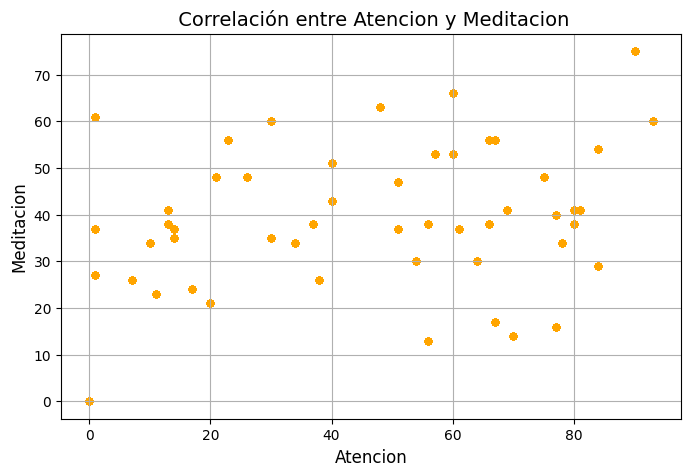

In [29]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 5))
plt.scatter(df_filtrado3['Atte (%)'], df_filtrado3['Med (%)'], color='orange', s=20)
plt.title(' Correlación entre Atencion y Meditacion', fontsize=14)
plt.xlabel('Atencion', fontsize=12)
plt.ylabel('Meditacion', fontsize=12)
plt.grid(True)
plt.show()

# Gráfico de dispersión Calculando la línea de regresión lineal (tendencia)

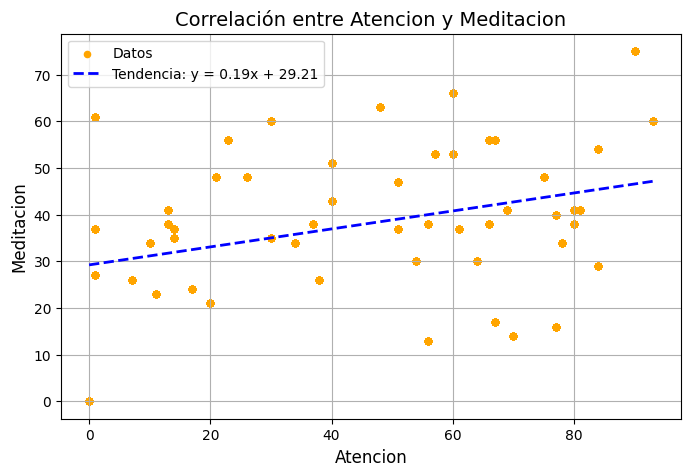

In [30]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(8, 5))
plt.scatter(df_filtrado3['Atte (%)'], df_filtrado3['Med (%)'], color='orange', s=20, label='Datos')

m3, b3 = np.polyfit(df_filtrado3['Atte (%)'], df_filtrado3['Med (%)'], 1)  # 1 = grado lineal (y = mx + b)
x3_vals = np.sort(df_filtrado3['Atte (%)'])
y3_vals = m3 * x3_vals + b3
plt.plot(x3_vals, y3_vals, color='blue', linestyle='--', linewidth=2, label=f'Tendencia: y = {m3:.2f}x + {b3:.2f}')

# Personalización
plt.title('Correlación entre Atencion y Meditacion', fontsize=14)
plt.xlabel('Atencion', fontsize=12)
plt.ylabel('Meditacion', fontsize=12)
plt.grid(True)
plt.legend()
plt.show()

# Interpretacion

In [31]:
print("\n💡 Interpretación:")
if abs(r_manual3) > 0.7:
    print("Correlación fuerte (🔵 Relación lineal clara).")
elif abs(r_manual3) > 0.3:
    print("Correlación moderada (🟡 Relación parcial).")
else:
    print("Correlación débil o nula (🔴 Sin relación lineal).")


💡 Interpretación:
Correlación moderada (🟡 Relación parcial).
